# Study Design

## Goals and Requirements
The goal of this study is to ascertain the 
- rate
- conditions (time lapsed, questions asked)
- common topics in which
a change from a mostly asking user to an actively answering one can occur
### Requirements:
For this study the open kaggle dataset of stackoverflow (150GB, 2 years old) will be used (out of convenience) and will thus require access to Googles BigQuery API


assuming Windows and Conda:

```
pip install --upgrade google-cloud-bigquery
conda install -c anaconda git
pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper
```

## Study Questions
*Does it happen that a q-user becomes an a-user?*

Problems in finding the answer to this question:
- one needs to define a cutoff between "initial a-user" and "q-user convert"
- maybe there is an "early onset" of the conversion by increased commenting?
-- maybe its even more important that the q-user starts commenting on other peoples questions?
- users might be more eager to start answering questions if their questions where well received, i.e. they received a high number of votes and high quality accepted answers (using votes as a metric for the quality of the answer)
- it might be worthwile to investigate other network sites on stackexchange: A user might only ask questions  on stackoverflow, but answer questions on math.stackexchange. This behaviour might influence wether or not the user will start answering questions on stackoverflow

## Research Method
Investigate a reasonably sized, random sample taken from the dataset, use visualisation methods and descriptive statistics to investigate trends and structure, use these insights to build a predictive model and evaluate its performance on a test set taken out of the same dataset

## Strategy
If possible, use the dataset on kaggle as a source for our data.
Decide on a resonable size of the dataset which we will consider for further analysis; using the entire dataset (let alone the *real* entire live dataset until ~2018) will not be feasible.

Start by seperating out a sample from the dataset which will later be used to evaluate performance.

For some of the required data, it might be neccesary to use stackAPI to gather additional data e.g. stats on other network sites.

# Data Retrieval

In [59]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

In [60]:
df = pandas.read_csv('./user_stats.csv')

### Testing that 'converted' q-users do exist:
This study can only work if all three groups:
- q-user: that to this day have not answered a question
- a-user: that to this day have not asked a question
- converts: former q-users
exist in significant numbers in the datasample.
Because this the selection of people who both asked and answered, converts would qualify themselvs by having at least a day between asking and answering (two destinct) questions.

In [61]:
%matplotlib inline
day_diff=np.array([int(i.days) for i in (pd.to_datetime(df['min_date_frage'])-pd.to_datetime(df['min_date_antw']))])
df['days']=day_diff
#print(timedifference)
df=df.sort_values('days', ascending=True)
df["days_sign"] = np.sign(df.days)
df['days'].describe()

count    1.167083e+06
mean    -8.824696e+01
std      4.710262e+02
min     -3.620000e+03
25%     -1.610000e+02
50%     -6.000000e+00
75%      0.000000e+00
max      3.675000e+03
Name: days, dtype: float64

In [62]:
print(df['days_sign'].value_counts())

-1    867559
 1    281493
 0     18031
Name: days_sign, dtype: int64


So one can see the out of every user that both asked and answered:
- 867 559 people answere a question first
- 281 493 people ask one first -> converts!
- 18 031 do both in the same day

### Assuming basic corelations
If one gets consistently high scores he/she might answere more questions and vice versa.
Here the two corelations seperately and a plot showing a corelation matrix

In [63]:
df['anzahl_antw'].corr(df['avg_score_antw'])

0.0236260978468442

In [64]:
df['anzahl_fragen'].corr(df['avg_score_frage'])

0.023026349017786035

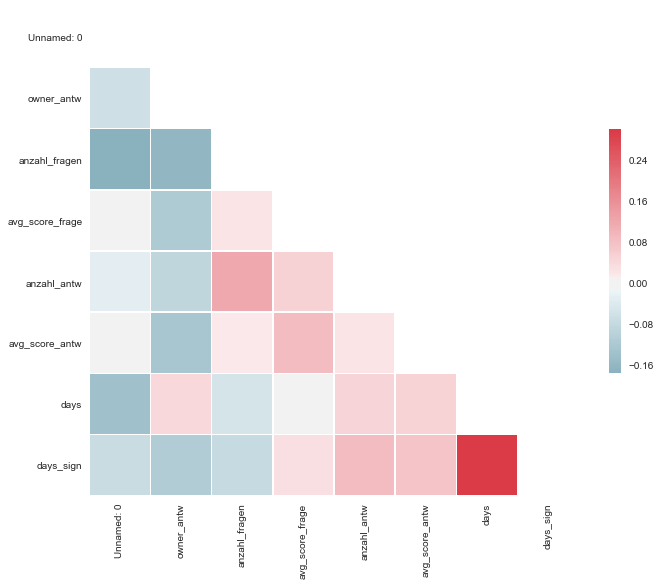

In [65]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [66]:
df.sort_values('anzahl_antw', ascending=False).head(1) # JON SKEET!

,Unnamed: 0,owner_antw,anzahl_fragen,avg_score_frage,min_date_frage,anzahl_antw,avg_score_antw,min_date_antw,days,days_sign
44513,44513,22656,50,135.86,2008-10-11 19:30:45.407000+00:00,34139,11.541229,2008-09-26 12:11:29.083000+00:00,15,1
